In [3]:
# Support Vector Machining on the Iris Dataset
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC 

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)] # petal length, petal width
y = (iris["target"] == 2).astype(np.float64) # Iris virginica

svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("linear_svc", LinearSVC(C=1, loss="hinge")),
    ])

#Or use SVC class: SVC(kernel="linear", C=1)
#Or use SGDClassifier(loss="hing", alpha=1/(m*C))
# - Stochastic Gradient Descent to train an SVM
# - Good for out-of-core/online training

svm_clf.fit(X, y)
svm_clf.predict([[5.5, 1.7]])


array([1.])

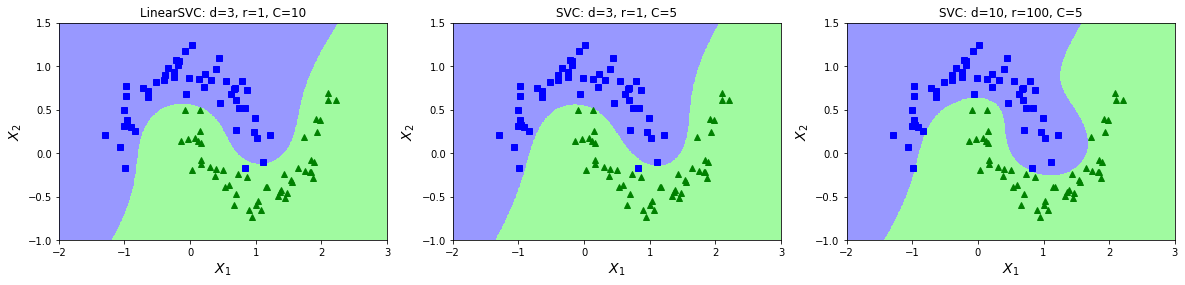

In [21]:
# Nonlinear SVM
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

X, y = make_moons(n_samples=100, noise=0.15)
polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge"))
    ])

polynomial_svm_clf.fit(X, y)

from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
    ])

poly_kernel_svm_clf.fit(X, y)

poly_kernel_svm_clf_high_deg = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))
    ])

poly_kernel_svm_clf_high_deg.fit(X, y)

from matplotlib.colors import ListedColormap
plt.figure(figsize=(20, 4))
plt.subplot(131)
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")
x0, x1 = np.meshgrid(
    np.linspace(-2, 3, 500).reshape(-1, 1),
    np.linspace(-1, 1.5, 200).reshape(-1, 1), )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = polynomial_svm_clf.predict(X_new)
zz = y_predict.reshape(x0.shape) 
custom_cmap = ListedColormap(
    ['#9898ff','#a0faa0'])
plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.title("LinearSVC: d=3, r=1, C=10")
plt.xlabel(r'$X_1$', fontsize=14)
plt.ylabel(r'$X_2$', fontsize=14) 

plt.subplot(132)
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")
y_predict = poly_kernel_svm_clf.predict(X_new)
zz = y_predict.reshape(x0.shape) 
plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.title("SVC: d=3, r=1, C=5")
plt.xlabel(r'$X_1$', fontsize=14)
plt.ylabel(r'$X_2$', fontsize=14) 

plt.subplot(133)
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")
y_predict = poly_kernel_svm_clf_high_deg.predict(X_new)
zz = y_predict.reshape(x0.shape) 
plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.title("SVC: d=10, r=100, C=5")
plt.xlabel(r'$X_1$', fontsize=14)
plt.ylabel(r'$X_2$', fontsize=14) 
plt.show()

In [8]:
#Similarity distances as kernel SVC

array([0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0], dtype=int64)

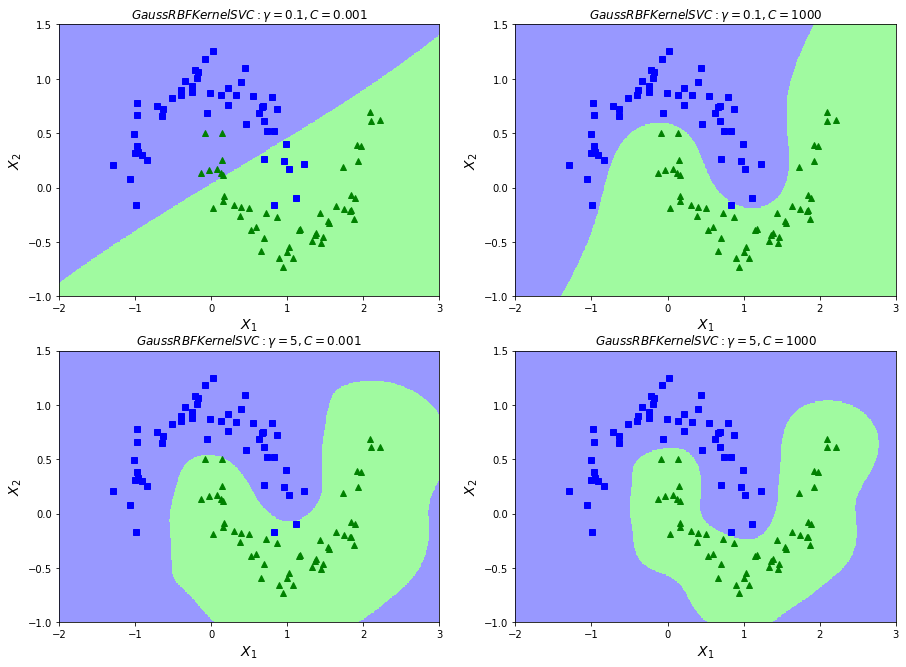

In [26]:
rbf_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=0.1, C=0.001))
    ])
rbf_kernel_svm_clf.fit(X, y)

plt.figure(figsize=(15, 11))
plt.subplot(221)
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")
x0, x1 = np.meshgrid(
    np.linspace(-2, 3, 500).reshape(-1, 1),
    np.linspace(-1, 1.5, 200).reshape(-1, 1), )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = rbf_kernel_svm_clf.predict(X_new)
zz = y_predict.reshape(x0.shape) 
custom_cmap = ListedColormap(
    ['#9898ff','#a0faa0'])
plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.title(r'$Gauss RBF Kernel SVC: \gamma=0.1, C=0.001$')
plt.xlabel(r'$X_1$', fontsize=14)
plt.ylabel(r'$X_2$', fontsize=14) 

plt.subplot(222)
rbf_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=0.1, C=1000))
    ])
rbf_kernel_svm_clf.fit(X, y)
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")
y_predict = rbf_kernel_svm_clf.predict(X_new)
zz = y_predict.reshape(x0.shape) 
plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.title(r'$Gauss RBF Kernel SVC: \gamma=0.1, C=1000$')
plt.xlabel(r'$X_1$', fontsize=14)
plt.ylabel(r'$X_2$', fontsize=14)

plt.subplot(223)
rbf_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
    ])
rbf_kernel_svm_clf.fit(X, y)
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")
y_predict = rbf_kernel_svm_clf.predict(X_new)
zz = y_predict.reshape(x0.shape) 
plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.title(r'$Gauss RBF Kernel SVC: \gamma=5, C=0.001$')
plt.xlabel(r'$X_1$', fontsize=14)
plt.ylabel(r'$X_2$', fontsize=14) 

plt.subplot(224)
rbf_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=5, C=1000))
    ])
rbf_kernel_svm_clf.fit(X, y)
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")
y_predict = rbf_kernel_svm_clf.predict(X_new)
zz = y_predict.reshape(x0.shape) 
plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.title(r'$Gauss RBF Kernel SVC: \gamma=5, C=1000$')
plt.xlabel(r'$X_1$', fontsize=14)
plt.ylabel(r'$X_2$', fontsize=14)

plt.show()

In [27]:
#Now use SVMs for regression
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=1.5)
svm_reg.fit(X, y)

LinearSVR(epsilon=1.5)